In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
!pip install easyocr

In [3]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#IMAGE_PATH = 'smile.jpg'
IMAGE_PATH = 'sign.png'

**1. Read in images or video**

In [8]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

[([[19, 181], [165, 181], [165, 201], [19, 201]],
  'HEAD PROTECTION',
  0.9778256601171587),
 ([[31, 201], [153, 201], [153, 219], [31, 219]],
  'MUST BE WORN',
  0.9683688296531474),
 ([[39, 219], [145, 219], [145, 237], [39, 237]],
  'ON THIS SITE',
  0.9683973806374694)]

**2. Draw Results**

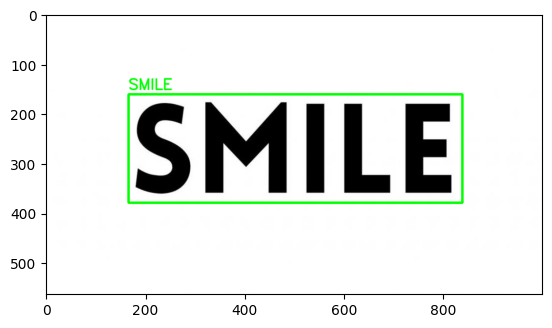

In [6]:
import cv2
import matplotlib.pyplot as plt

# Assuming 'result' contains the data in the format [(coordinates, text)]
# Extract the top-left and bottom-right coordinates from the result for the bounding box
top_left = tuple(result[0][0][0])         # Top-left corner of the bounding box
bottom_right = tuple(result[0][0][2])     # Bottom-right corner of the bounding box
text = result[0][1]                       # The text detected within the bounding box

# Load the image where we want to draw the bounding box and display the text
img = cv2.imread('/content/smile.jpg')

# Draw a rectangle around the detected object using the top-left and bottom-right coordinates
# Parameters: image, top-left corner, bottom-right corner, color (green), line thickness
img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)

# Set the font for displaying the text
font = cv2.FONT_HERSHEY_SIMPLEX

# Calculate the position to display the text slightly above the bounding box
text_position = (top_left[0], top_left[1] - 10)  # 10 pixels above the top-left corner

# Ensure the text is within the boundaries of the image (prevent overflow at the edges)
text_position = (max(text_position[0], 0), max(text_position[1], 0))

# Put the detected text above the bounding box on the image
# Parameters: image, text, position, font, font scale, color (green), thickness, line type
img = cv2.putText(img, text, text_position, font, 1, (0, 255, 0), 2, cv2.LINE_AA)

# Convert the image from BGR to RGB for correct display with matplotlib (OpenCV uses BGR format by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image with the bounding box and text using matplotlib
plt.imshow(img_rgb)
plt.show()


**3. Handling Multiple Lines**

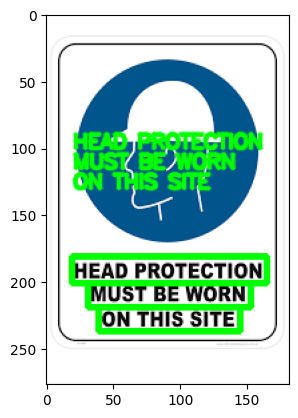

In [9]:
# Load the image
img = cv2.imread('/content/sign.png')

# Initialize a variable 'spacer' to define the spacing for text display below the bounding box
spacer = 100

# Loop through all detected elements in the 'result' (assuming 'result' contains [(coordinates, text)] format)
for detection in result:
    # Extract the top-left and bottom-right coordinates of the bounding box from the detection result
    top_left = tuple(detection[0][0])       # Top-left corner of the bounding box
    bottom_right = tuple(detection[0][2])   # Bottom-right corner of the bounding box
    text = detection[1]                     # Extract the detected text

    # Draw a rectangle around the detected object
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)

    # Put the detected text on the image below the bounding box
    img = cv2.putText(img, text, (20, spacer), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

    # Increase the spacer value to display the next text lower down (so the text doesn't overlap)
    spacer += 15

# Convert BGR to RGB for proper display with matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Display the final image with bounding boxes and detected text
plt.show()
